## Create Equal Weighted Network X Graph And Save The Location Co-ordinates.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import osmnx as ox
import numpy as np
import pandas as pd
import math

random_seed = 44


def create_graph_network(nodes_list, weights):
    """
    This function generates and plots a graph object by taking nodes list and edges as input.
    """
    G = nx.Graph()
    G.add_nodes_from(nodes_list)
    G.add_weighted_edges_from(weights)
    pos=nx.spring_layout(G, seed=random_seed)
    nx.draw(G, pos, with_labels=True)
    edge_weight =(nx.get_edge_attributes(G,'weight'))
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.axis('on')
    plt.show()
    return G, pos

def get_coord_of_nodes(pos):
    xc = []
    yc = []

    for i in pos:
        coord = pos[i]
        xc.append(coord[0])
        yc.append(coord[1])
        
    return xc, yc

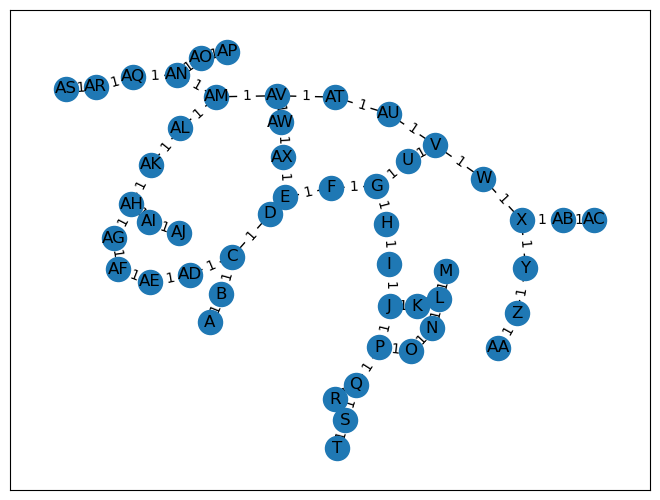

In [2]:
#Configure the nodes and edges
nodes_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
              'AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR','AS','AT','AU','AV','AW','AX']

weights = [('A', 'B', 1), 
         ('B', 'C', 1), 
         ('C', 'D', 1),('C', 'AD', 1) ,
         ('D', 'E', 7), 
         ('E', 'F', 1), ('E', 'AX', 1),
         ('F', 'G', 1), 
         ('G', 'H', 1), ('G', 'U', 1),
         ('H', 'I', 1),
         ('I', 'J', 1),
         ('J', 'K', 1), ('J', 'P', 1),
         ('K', 'L', 1),
         ('L', 'M', 1), ('L', 'N', 1),
         ('N', 'O', 1), 
         ('O', 'P', 1),
         ('P', 'Q', 1),
         ('Q', 'R', 1), ('Q', 'S', 1),
         ('P', 'Q', 1),
         ('S', 'T', 1),
         ('U', 'V', 1),
         ('V', 'W', 1), ('V', 'AU', 1),
         ('W', 'X', 1),
         ('X', 'Y', 1), ('X', 'AB', 1),
         ('Y', 'Z', 1),
         ('Z', 'AA', 1),
         ('AB', 'AC', 1),
         ('AD', 'AE', 1),
         ('AE', 'AF', 1),
         ('AF', 'AG', 1),
         ('AG', 'AH', 1),
         ('AH', 'AI', 1), ('AH', 'AK', 1),
         ('AI', 'AJ', 1),
         ('AK', 'AL', 1),
         ('AL', 'AM', 1),
         ('AM', 'AN', 1), ('AM', 'AV', 1),
         ('AN', 'AO', 1), ('AN', 'AQ', 1),
         ('AO', 'AP', 1),
         ('AQ', 'AR', 1),
         ('AR', 'AS', 1),
         ('AV', 'AT', 1),
         ('AT', 'AU', 1),
         ('AV', 'AW', 1),
         ('AW', 'AX', 1)]

#Create the graph network using the sand accumulation information
G, pos = create_graph_network(nodes_list, weights)
xc, yc = get_coord_of_nodes(pos)


df = pd.DataFrame()
df['Node'] = nodes_list
df['Node_Index'] = range(len(nodes_list))
df['lats'] = xc
df['lons'] = yc
df.to_csv("NetworkX_Coord.csv", index=None)

## Or-tools with Time Windows On NetworkX Coordinates

Total Volume of Sand:  364
Total Capacity of Available Vehicles:  850

The Objective Value is 2402384
Route 0: 18 Load(0) Time(0:00:00, 0:00:00) ->  1 Load(0) Time(7:11:49, 7:49:12) ->  30 Load(1) Time(10:08:33, 10:45:56) ->  31 Load(9) Time(12:43:50, 14:13:34) ->  32 Load(13) Time(15:06:30, 15:53:11) ->  34 Load(24) Time(17:34:12, 18:20:53) ->  29 Load(35) Time(21:14:21, 22:01:02) ->  35 Load(37) Time(23:13:19, 1 day, 0:00:00) ->  EndRoute 0. 

Route 1: Empty 

Route 2: 23 Load(0) Time(0:00:00, 0:00:00) ->  41 Load(0) Time(14:03:36, 15:00:13) ->  39 Load(9) Time(17:00:30, 17:57:07) ->  37 Load(22) Time(20:21:33, 21:18:10) ->  38 Load(31) Time(23:03:23, 1 day, 0:00:00) ->  EndRoute 2. 

Route 3: 2 Load(0) Time(0:00:00, 0:00:00) ->  33 Load(0) Time(9:27:46, 10:40:00) ->  0 Load(7) Time(15:54:58, 17:07:12) ->  16 Load(14) Time(22:47:46, 1 day, 0:00:00) ->  EndRoute 3. 

Route 4: 23 Load(0) Time(0:00:00, 0:00:00) ->  24 Load(0) Time(2:02:27, 2:02:32) ->  25 Load(3) Time(4:12:07, 4:12:12) 

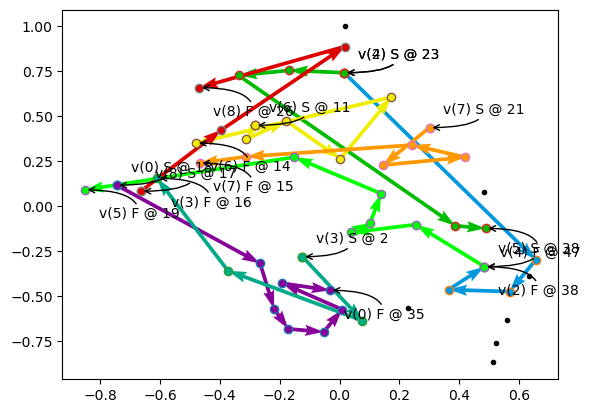

In [3]:
"""Capacitated Vehicle Routing Problem with Time Windows (and optional orders).

   This is a sample using the routing library python wrapper to solve a
   CVRPTW problem.
   A description of the problem can be found here:
   http://en.wikipedia.org/wiki/Vehicle_routing_problem.
   The variant which is tackled by this model includes a capacity dimension,
   time windows and optional orders, with a penalty cost if orders are not
   performed.
   To help explore the problem, two classes are provided Locations() and
   Vehicles(): used to randomly locate orders and depots, and to randomly
   generate demands, time-window constraints and vehicles.
   Distances are computed using the Great Circle distances. Distances are in km
   and times in seconds.

   A function for the displaying of the vehicle plan
   display_vehicle_output

   The optimization engine uses local search to improve solutions, first
   solutions being generated using a cheapest addition heuristic.
   Numpy and Matplotlib are required for the problem creation and display.

"""
import os
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2
from datetime import datetime, timedelta
import networkx as nx
import pandas as pd
import math

random_seed = 42


class Locations():
    """
        A class that generates and holds locations information.

        Randomly normally distribute a number of locations and locations within
        a region described by a rectangle.  Generate a random demand for each
        customer. Generate a random time window for each customer.
        May either be initiated with the extents, as a dictionary describing
        two corners of a rectangle in latitude and longitude OR as a center
        point (lat, lon), and box_size in km.  The default arguments are for a
        10 x 10 km square centered in Sheffield).

        Args: 
            extents (Optional[Dict]): A dictionary describing a rectangle in
            latitude and longitude with the keys 'llcrnrlat', 'llcrnrlon' &
            'urcrnrlat' & 'urcrnrlat'  
        
        center (Optional(Tuple): A tuple of (latitude, longitude) describing the centre of the rectangle.  
        box_size (Optional float: The length in km of the box's sides. 
        num_stops (int): The number of locations, including the depots that are placed normally distributed in the rectangle.  
        min_demand (int): Lower limit on the
        randomly generated demand at each customer.  
        max_demand (int): Upper limit on the randomly generated demand at each customer.
        min_tw: shortest random time window for a customer, in hours.
        max_tw: longest random time window for a customer, in hours.
        
        Examples: To place 100 locations randomly within 100 km x 100 km
        rectangle, centered in the default location, with a random demand of
        between 5 and 10 units:  >>> locations = Locations(num_stops=100,
        box_size=100, ...                 min_demand=5, max_demand=10)
        alternatively, to place 75 locations in the same area with default
        arguments for demand:  >>> extents = {'urcrnrlon': 0.03403, 'llcrnrlon':
        -2.98325, ...     'urcrnrlat': 54.28127, 'llcrnrlat': 52.48150} >>>
        locations = Locations(num_stops=75, extents=extents)
  """

    def __init__(self,
                 extents=None,
                 center=(53.381393, -1.474611),
                 box_size=10,
                 num_stops=100,
                 min_demand=0,
                 max_demand=25,
                 min_tw=1,
                 max_tw=5):
        self.number = num_stops  #: The number of locations and depots
        #: Location, a named tuple for locations.
        Location = namedtuple('Location', ['lat', 'lon'])
        if extents is not None:
            self.extents = extents  #: The lower left and upper right points
            #: Location[lat,lon]: the centre point of the area.
            self.center = Location(
                extents['urcrnrlat'] - 0.5 *
                (extents['urcrnrlat'] - extents['llcrnrlat']),
                extents['urcrnrlon'] - 0.5 *
                (extents['urcrnrlon'] - extents['llcrnrlon']))
        else:
            #: Location[lat,lon]: the centre point of the area.
            (clat, clon) = self.center = Location(center[0], center[1])
            rad_earth = 6367  # km
            circ_earth = np.pi * rad_earth
            #: The lower left and upper right points
            self.extents = {
                'llcrnrlon': (clon - 180 * box_size /
                              (circ_earth * np.cos(np.deg2rad(clat)))),
                'llcrnrlat':
                clat - 180 * box_size / circ_earth,
                'urcrnrlon': (clon + 180 * box_size /
                              (circ_earth * np.cos(np.deg2rad(clat)))),
                'urcrnrlat':
                clat + 180 * box_size / circ_earth
            }
        # The 'name' of the stop, indexed from 0 to num_stops-1
        stops = np.array(range(0, num_stops))
        # normaly distributed random distribution of stops within the box
        stdv = 6  # the number of standard deviations 99.9% will be within +-3
        lats = (self.extents['llcrnrlat'] + np.random.randn(num_stops) *
                (self.extents['urcrnrlat'] - self.extents['llcrnrlat']) / stdv)
        lons = (self.extents['llcrnrlon'] + np.random.randn(num_stops) *
                (self.extents['urcrnrlon'] - self.extents['llcrnrlon']) / stdv)
        
        coord_df = pd.read_csv("NetworkX_Coord.csv")
        lats = coord_df['lats']
        lons = coord_df['lons']
        
        
        # uniformly distributed integer demands.
        demands = np.random.randint(min_demand, max_demand, num_stops)

        self.time_horizon = 24 * 60**2  # A 24 hour period.

        # The locations demand min_tw to max_tw hour time window for each
        # delivery
        time_windows = np.random.randint(min_tw * 3600, max_tw * 3600,
                                                 num_stops)
        # The last time a delivery window can start
        latest_time = self.time_horizon - time_windows
        start_times = [None for o in time_windows]
        stop_times = [None for o in time_windows]
        # Make random timedeltas, nominally from the start of the day.
        for idx in range(self.number):
            stime = int(np.random.randint(0, latest_time[idx]))
            start_times[idx] = timedelta(seconds=stime)
            stop_times[idx] = (
                start_times[idx] + timedelta(seconds=int(time_windows[idx])))
        # A named tuple for the customer
        Location = namedtuple(
            'Location',
            [
                'index',  # the index of the stop
                'demand',  # the demand for the stop
                'lat',  # the latitude of the stop
                'lon',  # the longitude of the stop
                'tw_open',  # timedelta window open
                'tw_close'
            ])  # timedelta window cls

        self.locations = [
            Location(idx, dem, lat, lon, tw_open, tw_close)
            for idx, dem, lat, lon, tw_open, tw_close in zip(
                stops, demands, lats, lons, start_times, stop_times)
        ]

        # The number of seconds needed to 'unload' 1 unit of goods.
        self.service_time_per_dem = 300  # seconds

    def set_manager(self, manager):
        self.manager = manager

    def central_start_node(self, invert=False):
        """
        Return a random starting node, with probability weighted by distance
        from the centre of the extents, so that a central starting node is
        likely.

        Args: invert (Optional bool): When True, a peripheral starting node is
        most likely.

        Returns:
            int: a node index.

        Examples:
            >>> locations.central_start_node(invert=True)
            42
        """
        num_nodes = len(self.locations)
        dist = np.empty((num_nodes, 1))
        for idx_to in range(num_nodes):
            dist[idx_to] = self._haversine(self.center.lon, self.center.lat,
                                           self.locations[idx_to].lon,
                                           self.locations[idx_to].lat)
        furthest = np.max(dist)

        if invert:
            prob = dist * 1.0 / sum(dist)
        else:
            prob = (furthest - dist * 1.0) / sum(furthest - dist)
        indexes = np.array([range(num_nodes)])
        start_node = np.random.choice(
            indexes.flatten(), size=1, replace=True, p=prob.flatten())
        return start_node[0]

    def make_distance_mat(self, method='haversine'):
        """
        Return a distance matrix and make it a member of Location, using the
        method given in the call. Currently only Haversine (GC distance) is
        implemented, but Manhattan, or using a maps API could be added here.
        Raises an AssertionError for all other methods.

        Args: method (Optional[str]): method of distance calculation to use. The
        Haversine formula is the only method implemented.

        Returns:
            Numpy array of node to node distances.

        Examples:
            >>> dist_mat = locations.make_distance_mat(method='haversine')
            >>> dist_mat = locations.make_distance_mat(method='manhattan')
            AssertionError
        """
        self.distmat = np.zeros((self.number, self.number))
        methods = {'haversine': self._haversine}
        assert (method in methods)
        for frm_idx in range(self.number):
            for to_idx in range(self.number):
                if frm_idx != to_idx:
                    frm_c = self.locations[frm_idx]
                    to_c = self.locations[to_idx]
                    self.distmat[frm_idx, to_idx] = self._haversine(
                        frm_c.lon, frm_c.lat, to_c.lon, to_c.lat)
        return (self.distmat)

    def _haversine(self, lon1, lat1, lon2, lat2):
        """
        Calculate the great circle distance between two points
        on the earth specified in decimal degrees of latitude and longitude.
        https://en.wikipedia.org/wiki/Haversine_formula

        Args:
            lon1: longitude of pt 1,
            lat1: latitude of pt 1,
            lon2: longitude of pt 2,
            lat2: latitude of pt 2

        Returns:
            the distace in km between pt1 and pt2
        """
        # convert decimal degrees to radians
        lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

        # haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = (np.sin(dlat / 2)**2 +
             np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2)
        c = 2 * np.arcsin(np.sqrt(a))

        # 6367 km is the radius of the Earth
        km = 6367 * c
        return km

    def get_total_demand(self):
        """
        Return the total demand of all locations.
        """
        td = (sum([c.demand for c in self.locations]))
        return td

    def return_dist_callback(self, **kwargs):
        """
        Return a callback function for the distance matrix.

        Args: **kwargs: Arbitrary keyword arguments passed on to
        make_distance_mat()

        Returns:
            function: dist_return(a,b) A function that takes the 'from' node
                index and the 'to' node index and returns the distance in km.
        """
        self.make_distance_mat(**kwargs)

        def dist_return(from_index, to_index):
            # Convert from routing variable Index to distance matrix NodeIndex.
            from_node = self.manager.IndexToNode(from_index)
            to_node = self.manager.IndexToNode(to_index)
            return (self.distmat[from_node][to_node])

        return dist_return

    def return_dem_callback(self):
        """
        Return a callback function that gives the demands.

        Returns:
            function: dem_return(a) A function that takes the 'from' node
                index and returns the distance in km.
        """

        def dem_return(from_index):
            # Convert from routing variable Index to distance matrix NodeIndex.
            from_node = self.manager.IndexToNode(from_index)
            return (self.locations[from_node].demand)

        return dem_return

    def zero_depot_demands(self, depot):
        """
        Zero out the demands and time windows of depot.  The Depots do not have
        demands or time windows so this function clears them.

        Args:  depot (int): index of the stop to modify into a depot.
        Examples:  >>> locations.zero_depot_demands(5) >>>
        locations.locations[5].demand == 0 True
    """
        start_depot = self.locations[depot]
        self.locations[depot] = start_depot._replace(
            demand=0, tw_open=None, tw_close=None)

    def make_service_time_call_callback(self):
        """
        Return a callback function that provides the time spent servicing the
        customer.  Here is it proportional to the demand given by
        self.service_time_per_dem, default 300 seconds per unit demand.

        Returns:
            function [dem_return(a, b)]: A function that takes the from/a node
                index and the to/b node index and returns the service time at a

        """

        def service_time_return(a, b):
            return (self.locations[a].demand * self.service_time_per_dem)

        return service_time_return

    def make_transit_time_callback(self, speed_kmph=10):
        """
        Creates a callback function for transit time. Assuming an average
        speed of speed_kmph
        Args:
            speed_kmph: the average speed in km/h

        Returns:
            function [transit_time_return(a, b)]: A function that takes the
                from/a node index and the to/b node index and returns the
                transit time from a to b.
        """

        def transit_time_return(a, b):
            return (self.distmat[a][b] / (speed_kmph * 1.0 / 60**2))

        return transit_time_return


class Vehicles():
    """
    A Class to create and hold vehicle information.

    The Vehicles in a CVRPTW problem service the locations and belong to a
    depot. The class Vehicles creates a list of named tuples describing the
    Vehicles.  The main characteristics are the vehicle capacity, fixed cost,
    and cost per km.  The fixed cost of using a certain type of vehicles can be
    higher or lower than others. If a vehicle is used, i.e. this vehicle serves
    at least one node, then this cost is added to the objective function.

    Note:
        If numpy arrays are given for capacity and cost, then they must be of
        the same length, and the number of vehicles are inferred from them.
        If scalars are given, the fleet is homogeneous, and the number of
        vehicles is determined by number.

    Args: capacity (scalar or numpy array): The integer capacity of demand
    units.  cost (scalar or numpy array): The fixed cost of the vehicle.  number
    (Optional [int]): The number of vehicles in a homogeneous fleet.
  """

    def __init__(self, capacity=100, cost=100, number=None):

        Vehicle = namedtuple('Vehicle', ['index', 'capacity', 'cost'])

        if number is None:
            self.number = np.size(capacity)
        else:
            self.number = number
        idxs = np.array(range(0, self.number))

        if np.isscalar(capacity):
            capacities = capacity * np.ones_like(idxs)
        elif np.size(capacity) != self.number:
            print('capacity is neither scalar, nor the same size as num!')
        else:
            capacities = capacity

        if np.isscalar(cost):
            costs = cost * np.ones_like(idxs)
        elif np.size(cost) != self.number:
            print(np.size(cost))
            print('cost is neither scalar, nor the same size as num!')
        else:
            costs = cost

        self.vehicles = [
            Vehicle(idx, capacity, cost)
            for idx, capacity, cost in zip(idxs, capacities, costs)
        ]

    def get_total_capacity(self):
        tc = (sum([c.capacity for c in self.vehicles]))
        return tc

    def return_starting_callback(self, locations, sameStartFinish=False):
        # create a different starting and finishing depot for each vehicle
        self.starts = [
            int(locations.central_start_node()) for o in range(self.number)
        ]
        if sameStartFinish:
            self.ends = self.starts
        else:
            self.ends = [
                int(locations.central_start_node(invert=True))
                for o in range(self.number)
            ]
        # the depots will not have demands, so zero them.
        for depot in self.starts:
            locations.zero_depot_demands(depot)
        for depot in self.ends:
            locations.zero_depot_demands(depot)

        def start_return(v):
            return (self.starts[v])

        return start_return
    

def discrete_cmap(N, base_cmap=None):
    """
    Create an N-bin discrete colormap from the specified input map
    """
    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


def vehicle_output_string(manager, routing, plan):
    """
    Return a string displaying the output of the routing instance and
    assignment (plan).

    Args: routing (ortools.constraint_solver.pywrapcp.RoutingModel): routing.
    plan (ortools.constraint_solver.pywrapcp.Assignment): the assignment.

    Returns:
        (string) plan_output: describing each vehicle's plan.

        (List) dropped: list of dropped orders.

    """
    dropped = []
    for order in range(routing.Size()):
        if (plan.Value(routing.NextVar(order)) == order):
            dropped.append(str(order))

    capacity_dimension = routing.GetDimensionOrDie('Capacity')
    time_dimension = routing.GetDimensionOrDie('Time')
    plan_output = ''

    for route_number in range(routing.vehicles()):
        order = routing.Start(route_number)
        plan_output += 'Route {0}:'.format(route_number)
        if routing.IsEnd(plan.Value(routing.NextVar(order))):
            plan_output += ' Empty \n'
        else:
            while True:
                load_var = capacity_dimension.CumulVar(order)
                time_var = time_dimension.CumulVar(order)
                node = manager.IndexToNode(order)
                plan_output += \
                    ' {node} Load({load}) Time({tmin}, {tmax}) -> '.format(
                        node=node,
                        load=plan.Value(load_var),
                        tmin=str(timedelta(seconds=plan.Min(time_var))),
                        tmax=str(timedelta(seconds=plan.Max(time_var))))

                if routing.IsEnd(order):
                    plan_output += ' EndRoute {0}. \n'.format(route_number)
                    break
                order = plan.Value(routing.NextVar(order))
        plan_output += '\n'

    return (plan_output, dropped)


def build_vehicle_route(manager, routing, plan, locations, veh_number):
    """
    Build a route for a vehicle by starting at the strat node and
    continuing to the end node.

    Args: routing (ortools.constraint_solver.pywrapcp.RoutingModel): routing.
    plan (ortools.constraint_solver.pywrapcp.Assignment): the assignment.
    locations (Locations): the locations instance.  veh_number (int): index of
    the vehicle

    Returns:
        (List) route: indexes of the locations for vehicle veh_number
    """
    veh_used = routing.IsVehicleUsed(plan, veh_number)
    print('Vehicle {0} is used {1}'.format(veh_number, veh_used))
    if veh_used:
        route = []
        node = routing.Start(veh_number)  # Get the starting node index
        route.append(locations.locations[manager.IndexToNode(node)])
        while not routing.IsEnd(node):
            route.append(locations.locations[manager.IndexToNode(node)])
            node = plan.Value(routing.NextVar(node))

        route.append(locations.locations[manager.IndexToNode(node)])
        return route
    else:
        return None


def plot_vehicle_routes(veh_route, ax1, locations, vehicles):
    """
    Plot the vehicle routes on matplotlib axis ax1.

    Args: veh_route (dict): a dictionary of routes keyed by vehicle idx.  ax1
    (matplotlib.axes._subplots.AxesSubplot): Matplotlib axes  locations
    (Locations): the locations instance.  vehicles (Vehicles): the vehicles
    instance.
  """
    veh_used = [v for v in veh_route if veh_route[v] is not None]

    cmap = discrete_cmap(vehicles.number + 2, 'nipy_spectral')

    for veh_number in veh_used:

        lats, lons = zip(*[(c.lat, c.lon) for c in veh_route[veh_number]])
        lats = np.array(lats)
        lons = np.array(lons)
        s_dep = locations.locations[vehicles.starts[veh_number]]
        s_fin = locations.locations[vehicles.ends[veh_number]]
        ax1.annotate(
            'v({veh}) S @ {node}'.format(
                veh=veh_number, node=vehicles.starts[veh_number]),
            xy=(s_dep.lon, s_dep.lat),
            xytext=(10, 10),
            xycoords='data',
            textcoords='offset points',
            arrowprops=dict(
                arrowstyle='->',
                connectionstyle='angle3,angleA=90,angleB=0',
                shrinkA=0.05),
        )
        ax1.annotate(
            'v({veh}) F @ {node}'.format(
                veh=veh_number, node=vehicles.ends[veh_number]),
            xy=(s_fin.lon, s_fin.lat),
            xytext=(10, -20),
            xycoords='data',
            textcoords='offset points',
            arrowprops=dict(
                arrowstyle='->',
                connectionstyle='angle3,angleA=-90,angleB=0',
                shrinkA=0.05),
        )
        ax1.plot(lons, lats, 'o', mfc=cmap(veh_number + 1))
        ax1.quiver(
            lons[:-1],
            lats[:-1],
            lons[1:] - lons[:-1],
            lats[1:] - lats[:-1],
            scale_units='xy',
            angles='xy',
            scale=1,
            color=cmap(veh_number + 1))


def main():
    # Create a set of customer, (and depot) stops.
    locations = Locations(
        num_stops=50,
        min_demand=1,
        max_demand=15,
        box_size=40,
        min_tw=3,
        max_tw=6)

    # Create a list of inhomgenious vehicle capacities as integer units.
    capacity = [50, 75, 100, 50, 75, 50, 100, 150, 200]

    # Create a list of inhomogeneous fixed vehicle costs.
    cost = [int(100 + 2 * np.sqrt(c)) for c in capacity]

    # Create a set of vehicles, the number set by the length of capacity.
    vehicles = Vehicles(capacity=capacity, cost=cost)

    # check to see that the problem is feasible, if we don't have enough
    # vehicles to cover the demand, there is no point in going further.
    
    print("Total Volume of Sand: ", locations.get_total_demand())
    print("Total Capacity of Available Vehicles: ", vehicles.get_total_capacity())
    print()
    
    try:
        assert (locations.get_total_demand() < vehicles.get_total_capacity())

        # Set the starting nodes, and create a callback fn for the starting node.
        start_fn = vehicles.return_starting_callback(
            locations, sameStartFinish=False)
    
        # Create the routing index manager.
        manager = pywrapcp.RoutingIndexManager(
            locations.number,  # int number
            vehicles.number,  # int number
            vehicles.starts,  # List of int start depot
            vehicles.ends)  # List of int end depot
    
        locations.set_manager(manager)
    
        # Set model parameters
        model_parameters = pywrapcp.DefaultRoutingModelParameters()
    
        # The solver parameters can be accessed from the model parameters. For example :
        #   model_parameters.solver_parameters.CopyFrom(
        #       pywrapcp.Solver.DefaultSolverParameters())
        #    model_parameters.solver_parameters.trace_propagation = True
    
        # Make the routing model instance.
        routing = pywrapcp.RoutingModel(manager, model_parameters)
    
        parameters = pywrapcp.DefaultRoutingSearchParameters()
        # Setting first solution heuristic (cheapest addition).
        parameters.first_solution_strategy = (
            routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
        # Routing: forbids use of TSPOpt neighborhood, (this is the default behaviour)
        parameters.local_search_operators.use_tsp_opt = pywrapcp.BOOL_FALSE
        # Disabling Large Neighborhood Search, (this is the default behaviour)
        parameters.local_search_operators.use_path_lns = pywrapcp.BOOL_FALSE
        parameters.local_search_operators.use_inactive_lns = pywrapcp.BOOL_FALSE
    
        parameters.time_limit.seconds = 10
        parameters.use_full_propagation = True
        #parameters.log_search = True
    
        # Create callback fns for distances, demands, service and transit-times.
        dist_fn = locations.return_dist_callback()
        dist_fn_index = routing.RegisterTransitCallback(dist_fn)
    
        dem_fn = locations.return_dem_callback()
        dem_fn_index = routing.RegisterUnaryTransitCallback(dem_fn)
    
        # Create and register a transit callback.
        serv_time_fn = locations.make_service_time_call_callback()
        transit_time_fn = locations.make_transit_time_callback()
        def tot_time_fn(from_index, to_index):
            """
            The time function we want is both transit time and service time.
            """
            # Convert from routing variable Index to distance matrix NodeIndex.
            from_node = manager.IndexToNode(from_index)
            to_node = manager.IndexToNode(to_index)
            return serv_time_fn(from_node, to_node) + transit_time_fn(from_node, to_node)
    
        tot_time_fn_index = routing.RegisterTransitCallback(tot_time_fn)
    
        # Set the cost function (distance callback) for each arc, homogeneous for
        # all vehicles.
        routing.SetArcCostEvaluatorOfAllVehicles(dist_fn_index)
    
        # Set vehicle costs for each vehicle, not homogeneous.
        for veh in vehicles.vehicles:
            routing.SetFixedCostOfVehicle(veh.cost, int(veh.index))
    
        # Add a dimension for vehicle capacities
        null_capacity_slack = 0
        routing.AddDimensionWithVehicleCapacity(
            dem_fn_index,  # demand callback
            null_capacity_slack,
            capacity,  # capacity array
            True,
            'Capacity')
        # Add a dimension for time and a limit on the total time_horizon
        routing.AddDimension(
            tot_time_fn_index,  # total time function callback
            locations.time_horizon,
            locations.time_horizon,
            True,
            'Time')
    
        time_dimension = routing.GetDimensionOrDie('Time')
        for cust in locations.locations:
            if cust.tw_open is not None:
                time_dimension.CumulVar(manager.NodeToIndex(cust.index)).SetRange(
                    cust.tw_open.seconds, cust.tw_close.seconds)
        """
         To allow the dropping of orders, we add disjunctions to all the customer
        nodes. Each disjunction is a list of 1 index, which allows that customer to
        be active or not, with a penalty if not. The penalty should be larger
        than the cost of servicing that customer, or it will always be dropped!
        """
        # To add disjunctions just to the locations, make a list of non-depots.
        non_depot = set(range(locations.number))
        non_depot.difference_update(vehicles.starts)
        non_depot.difference_update(vehicles.ends)
        penalty = 400000  # The cost for dropping a node from the plan.
        nodes = [routing.AddDisjunction([manager.NodeToIndex(c)], penalty) for c in non_depot]
    
        # This is how you would implement partial routes if you already knew part
        # of a feasible solution for example:
        # partial = np.random.choice(list(non_depot), size=(4,5), replace=False)
    
        # routing.CloseModel()
        # partial_list = [partial[0,:].tolist(),
        #                 partial[1,:].tolist(),
        #                 partial[2,:].tolist(),
        #                 partial[3,:].tolist(),
        #                 [],[],[],[]]
        # print(routing.ApplyLocksToAllVehicles(partial_list, False))
    
        # Solve the problem !
        assignment = routing.SolveWithParameters(parameters)
    
        # The rest is all optional for saving, printing or plotting the solution.
        if assignment:
            ## save the assignment, (Google Protobuf format)
            #save_file_base = os.path.realpath(__file__).split('.')[0]
            #if routing.WriteAssignment(save_file_base + '_assignment.ass'):
            #    print('succesfully wrote assignment to file ' + save_file_base +
            #          '_assignment.ass')
    
            print('The Objective Value is {0}'.format(assignment.ObjectiveValue()))
    
            plan_output, dropped = vehicle_output_string(manager, routing, assignment)
            print(plan_output)
            if(len(', '.join(dropped)) != 0):
                print('Dropped Nodes: ' + ', '.join(dropped))
            else:
                print("No nodes are left to clean.")
    
            # you could print debug information like this:
            # print(routing.DebugOutputAssignment(assignment, 'Capacity'))
    
            vehicle_routes = {}
            for veh in range(vehicles.number):
                vehicle_routes[veh] = build_vehicle_route(manager, routing, assignment,
                                                          locations, veh)
    
            # Plotting of the routes in matplotlib.
            fig = plt.figure()
            ax = fig.add_subplot(111)
            # Plot all the nodes as black dots.
            clon, clat = zip(*[(c.lon, c.lat) for c in locations.locations])
            ax.plot(clon, clat, 'k.')
            # plot the routes as arrows
            plot_vehicle_routes(vehicle_routes, ax, locations, vehicles)
            plt.show()
    
        else:
            print('No vehicle assignment')    
    
    except:
        print("Number of Vehicles aren't sufficient to clean up the sand.")


if __name__ == '__main__':
    main()